Research Questions:

1. Percentage of the time that either model successfully made prediction of the images

2. For each permutation of the setting, rate of true positve and false negative

In [44]:
import pandas as pd
import numpy as np

In [45]:
permu_data = pd.read_csv("C:/Users/Leo Ngamkam/Documents/CU Boulder Assignment/Stats/5301-5000-Final-Report-main/5301-5000-Final-Report-main/data/joined_permutations.csv")

In [46]:
permu_data

,Unnamed: 0.1,img_path,file,src_age,src_gender,src_race,src_timestamp,Unnamed: 0,pred_race,pred_gender,pred_age_grp,pred_age_lower,pred_age_upper,pred_model,detection_enabled,detection_model,image_type,slash,src_age_grp
0,0,crop_part1/100_1_0_20170110183726390.jpg.chip.jpg,100_1_0_20170110183726390.jpg.chip.jpg,100,Female,White,2.017011e+16,0.0,White,Male,50-59,50.0,59.0,DeepFace,True,mtcnn,cropped,False,70-130
1,1,crop_part1/100_1_2_20170105174847679.jpg.chip.jpg,100_1_2_20170105174847679.jpg.chip.jpg,100,Female,Asian,2.017011e+16,0.0,Asian,Male,40-49,40.0,49.0,DeepFace,True,mtcnn,cropped,False,70-130
2,2,crop_part1/101_1_2_20170105174739309.jpg.chip.jpg,101_1_2_20170105174739309.jpg.chip.jpg,101,Female,Asian,2.017011e+16,0.0,White,Male,40-49,40.0,49.0,DeepFace,True,mtcnn,cropped,False,70-130
3,3,crop_part1/10_0_0_20161220222308131.jpg.chip.jpg,10_0_0_20161220222308131.jpg.chip.jpg,10,Male,White,2.016122e+16,0.0,Asian,Male,30-39,30.0,39.0,DeepFace,True,mtcnn,cropped,False,3-9
4,4,crop_part1/10_0_0_20170103200329407.jpg.chip.jpg,10_0_0_20170103200329407.jpg.chip.jpg,10,Male,White,2.017010e+16,0.0,White,Female,30-39,30.0,39.0,DeepFace,True,mtcnn,cropped,False,3-9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65145,3245,NaN,99_1_0_20170120134718759.jpg,99,Female,White,2.017012e+16,NaN,Indian,Female,20-29,20.0,29.0,FairFace,False,None,uncropped,False,70-130
65146,3246,NaN,99_1_0_20170120221920654.jpg,99,Female,White,2.017012e+16,NaN,White,Male,30-39,30.0,39.0,FairFace,False,None,uncropped,False,70-130
65147,3247,NaN,99_1_1_20170120134639935.jpg,99,Female,Black,2.017012e+16,NaN,Other,Male,70-130,70.0,130.0,FairFace,False,None,uncropped,False,70-130
65148,3248,NaN,9_0_0_20170120133313910.jpg,9,Male,White,2.017012e+16,NaN,White,Male,3-9,3.0,9.0,FairFace,False,None,uncropped,False,3-9


In [47]:
permu_data.src_age_grp.unique()

array(['70-130', '3-9', '10-19', '0-2', '20-29', '30-39', '40-49',
       '50-59', '60-69'], dtype=object)

In [48]:
permu_data.head(10)

# data on src_age_grp seems to be unaccurate as scr_age 10 appears to be in src_age_grp 3-9

,Unnamed: 0.1,img_path,file,src_age,src_gender,src_race,src_timestamp,Unnamed: 0,pred_race,pred_gender,pred_age_grp,pred_age_lower,pred_age_upper,pred_model,detection_enabled,detection_model,image_type,slash,src_age_grp
0,0,crop_part1/100_1_0_20170110183726390.jpg.chip.jpg,100_1_0_20170110183726390.jpg.chip.jpg,100,Female,White,2.017011e+16,0.0,White,Male,50-59,50.0,59.0,DeepFace,True,mtcnn,cropped,False,70-130
1,1,crop_part1/100_1_2_20170105174847679.jpg.chip.jpg,100_1_2_20170105174847679.jpg.chip.jpg,100,Female,Asian,2.017011e+16,0.0,Asian,Male,40-49,40.0,49.0,DeepFace,True,mtcnn,cropped,False,70-130
2,2,crop_part1/101_1_2_20170105174739309.jpg.chip.jpg,101_1_2_20170105174739309.jpg.chip.jpg,101,Female,Asian,2.017011e+16,0.0,White,Male,40-49,40.0,49.0,DeepFace,True,mtcnn,cropped,False,70-130
3,3,crop_part1/10_0_0_20161220222308131.jpg.chip.jpg,10_0_0_20161220222308131.jpg.chip.jpg,10,Male,White,2.016122e+16,0.0,Asian,Male,30-39,30.0,39.0,DeepFace,True,mtcnn,cropped,False,3-9
4,4,crop_part1/10_0_0_20170103200329407.jpg.chip.jpg,10_0_0_20170103200329407.jpg.chip.jpg,10,Male,White,2.017010e+16,0.0,White,Female,30-39,30.0,39.0,DeepFace,True,mtcnn,cropped,False,3-9
5,5,crop_part1/10_0_0_20170103200522151.jpg.chip.jpg,10_0_0_20170103200522151.jpg.chip.jpg,10,Male,White,2.017010e+16,0.0,White,Female,30-39,30.0,39.0,DeepFace,True,mtcnn,cropped,False,3-9
6,6,crop_part1/10_0_0_20170103233459275.jpg.chip.jpg,10_0_0_20170103233459275.jpg.chip.jpg,10,Male,White,2.017010e+16,0.0,White,Male,20-29,20.0,29.0,DeepFace,True,mtcnn,cropped,False,3-9
7,7,crop_part1/10_0_0_20170104013211746.jpg.chip.jpg,10_0_0_20170104013211746.jpg.chip.jpg,10,Male,White,2.017010e+16,0.0,White,Male,20-29,20.0,29.0,DeepFace,True,mtcnn,cropped,False,3-9
8,8,crop_part1/10_0_0_20170110215927291.jpg.chip.jpg,10_0_0_20170110215927291.jpg.chip.jpg,10,Male,White,2.017011e+16,0.0,White,Male,20-29,20.0,29.0,DeepFace,True,mtcnn,cropped,False,3-9
9,9,crop_part1/10_0_0_20170110220033115.jpg.chip.jpg,10_0_0_20170110220033115.jpg.chip.jpg,10,Male,White,2.017011e+16,0.0,White,Male,20-29,20.0,29.0,DeepFace,True,mtcnn,cropped,False,3-9


In [49]:
permu_data.dtypes

Unnamed: 0.1           int64
img_path              object
file                  object
src_age                int64
src_gender            object
src_race              object
src_timestamp        float64
Unnamed: 0           float64
pred_race             object
pred_gender           object
pred_age_grp          object
pred_age_lower       float64
pred_age_upper       float64
pred_model            object
detection_enabled       bool
detection_model       object
image_type            object
slash                   bool
src_age_grp           object
dtype: object

In [50]:
# Dropping src_age_grp

permu_data = permu_data.drop(columns = ["src_age_grp"])

permu_data

,Unnamed: 0.1,img_path,file,src_age,src_gender,src_race,src_timestamp,Unnamed: 0,pred_race,pred_gender,pred_age_grp,pred_age_lower,pred_age_upper,pred_model,detection_enabled,detection_model,image_type,slash
0,0,crop_part1/100_1_0_20170110183726390.jpg.chip.jpg,100_1_0_20170110183726390.jpg.chip.jpg,100,Female,White,2.017011e+16,0.0,White,Male,50-59,50.0,59.0,DeepFace,True,mtcnn,cropped,False
1,1,crop_part1/100_1_2_20170105174847679.jpg.chip.jpg,100_1_2_20170105174847679.jpg.chip.jpg,100,Female,Asian,2.017011e+16,0.0,Asian,Male,40-49,40.0,49.0,DeepFace,True,mtcnn,cropped,False
2,2,crop_part1/101_1_2_20170105174739309.jpg.chip.jpg,101_1_2_20170105174739309.jpg.chip.jpg,101,Female,Asian,2.017011e+16,0.0,White,Male,40-49,40.0,49.0,DeepFace,True,mtcnn,cropped,False
3,3,crop_part1/10_0_0_20161220222308131.jpg.chip.jpg,10_0_0_20161220222308131.jpg.chip.jpg,10,Male,White,2.016122e+16,0.0,Asian,Male,30-39,30.0,39.0,DeepFace,True,mtcnn,cropped,False
4,4,crop_part1/10_0_0_20170103200329407.jpg.chip.jpg,10_0_0_20170103200329407.jpg.chip.jpg,10,Male,White,2.017010e+16,0.0,White,Female,30-39,30.0,39.0,DeepFace,True,mtcnn,cropped,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65145,3245,NaN,99_1_0_20170120134718759.jpg,99,Female,White,2.017012e+16,NaN,Indian,Female,20-29,20.0,29.0,FairFace,False,None,uncropped,False
65146,3246,NaN,99_1_0_20170120221920654.jpg,99,Female,White,2.017012e+16,NaN,White,Male,30-39,30.0,39.0,FairFace,False,None,uncropped,False
65147,3247,NaN,99_1_1_20170120134639935.jpg,99,Female,Black,2.017012e+16,NaN,Other,Male,70-130,70.0,130.0,FairFace,False,None,uncropped,False
65148,3248,NaN,9_0_0_20170120133313910.jpg,9,Male,White,2.017012e+16,NaN,White,Male,3-9,3.0,9.0,FairFace,False,None,uncropped,False


In [51]:
# Creating new scr_age_grp

conditions = [
    (permu_data["src_age"] == 0) & (permu_data["src_age"] <= 2),
    (permu_data["src_age"] >= 3) & (permu_data["src_age"] <= 9),
    (permu_data["src_age"] >= 10) & (permu_data["src_age"] <= 19),
    (permu_data["src_age"] >= 20) & (permu_data["src_age"] <= 29),
    (permu_data["src_age"] >= 30) & (permu_data["src_age"] <= 39),
    (permu_data["src_age"] >= 40) & (permu_data["src_age"] <= 49),
    (permu_data["src_age"] >= 50) & (permu_data["src_age"] <= 59),
    (permu_data["src_age"] >= 60) & (permu_data["src_age"] <= 69),
    (permu_data["src_age"] >= 70) & (permu_data["src_age"] <= 130)
]

rang = ["0-2", "3-9", "10-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-130"]

permu_data["src_age_grp"] = np.select(conditions, rang)

permu_data

,Unnamed: 0.1,img_path,file,src_age,src_gender,src_race,src_timestamp,Unnamed: 0,pred_race,pred_gender,pred_age_grp,pred_age_lower,pred_age_upper,pred_model,detection_enabled,detection_model,image_type,slash,src_age_grp
0,0,crop_part1/100_1_0_20170110183726390.jpg.chip.jpg,100_1_0_20170110183726390.jpg.chip.jpg,100,Female,White,2.017011e+16,0.0,White,Male,50-59,50.0,59.0,DeepFace,True,mtcnn,cropped,False,70-130
1,1,crop_part1/100_1_2_20170105174847679.jpg.chip.jpg,100_1_2_20170105174847679.jpg.chip.jpg,100,Female,Asian,2.017011e+16,0.0,Asian,Male,40-49,40.0,49.0,DeepFace,True,mtcnn,cropped,False,70-130
2,2,crop_part1/101_1_2_20170105174739309.jpg.chip.jpg,101_1_2_20170105174739309.jpg.chip.jpg,101,Female,Asian,2.017011e+16,0.0,White,Male,40-49,40.0,49.0,DeepFace,True,mtcnn,cropped,False,70-130
3,3,crop_part1/10_0_0_20161220222308131.jpg.chip.jpg,10_0_0_20161220222308131.jpg.chip.jpg,10,Male,White,2.016122e+16,0.0,Asian,Male,30-39,30.0,39.0,DeepFace,True,mtcnn,cropped,False,10-19
4,4,crop_part1/10_0_0_20170103200329407.jpg.chip.jpg,10_0_0_20170103200329407.jpg.chip.jpg,10,Male,White,2.017010e+16,0.0,White,Female,30-39,30.0,39.0,DeepFace,True,mtcnn,cropped,False,10-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65145,3245,NaN,99_1_0_20170120134718759.jpg,99,Female,White,2.017012e+16,NaN,Indian,Female,20-29,20.0,29.0,FairFace,False,None,uncropped,False,70-130
65146,3246,NaN,99_1_0_20170120221920654.jpg,99,Female,White,2.017012e+16,NaN,White,Male,30-39,30.0,39.0,FairFace,False,None,uncropped,False,70-130
65147,3247,NaN,99_1_1_20170120134639935.jpg,99,Female,Black,2.017012e+16,NaN,Other,Male,70-130,70.0,130.0,FairFace,False,None,uncropped,False,70-130
65148,3248,NaN,9_0_0_20170120133313910.jpg,9,Male,White,2.017012e+16,NaN,White,Male,3-9,3.0,9.0,FairFace,False,None,uncropped,False,3-9


In [52]:
# Checking data. scr_age_grp seems to be correct now

permu_data.head(15)

,Unnamed: 0.1,img_path,file,src_age,src_gender,src_race,src_timestamp,Unnamed: 0,pred_race,pred_gender,pred_age_grp,pred_age_lower,pred_age_upper,pred_model,detection_enabled,detection_model,image_type,slash,src_age_grp
0,0,crop_part1/100_1_0_20170110183726390.jpg.chip.jpg,100_1_0_20170110183726390.jpg.chip.jpg,100,Female,White,2.017011e+16,0.0,White,Male,50-59,50.0,59.0,DeepFace,True,mtcnn,cropped,False,70-130
1,1,crop_part1/100_1_2_20170105174847679.jpg.chip.jpg,100_1_2_20170105174847679.jpg.chip.jpg,100,Female,Asian,2.017011e+16,0.0,Asian,Male,40-49,40.0,49.0,DeepFace,True,mtcnn,cropped,False,70-130
2,2,crop_part1/101_1_2_20170105174739309.jpg.chip.jpg,101_1_2_20170105174739309.jpg.chip.jpg,101,Female,Asian,2.017011e+16,0.0,White,Male,40-49,40.0,49.0,DeepFace,True,mtcnn,cropped,False,70-130
3,3,crop_part1/10_0_0_20161220222308131.jpg.chip.jpg,10_0_0_20161220222308131.jpg.chip.jpg,10,Male,White,2.016122e+16,0.0,Asian,Male,30-39,30.0,39.0,DeepFace,True,mtcnn,cropped,False,10-19
4,4,crop_part1/10_0_0_20170103200329407.jpg.chip.jpg,10_0_0_20170103200329407.jpg.chip.jpg,10,Male,White,2.017010e+16,0.0,White,Female,30-39,30.0,39.0,DeepFace,True,mtcnn,cropped,False,10-19
5,5,crop_part1/10_0_0_20170103200522151.jpg.chip.jpg,10_0_0_20170103200522151.jpg.chip.jpg,10,Male,White,2.017010e+16,0.0,White,Female,30-39,30.0,39.0,DeepFace,True,mtcnn,cropped,False,10-19
6,6,crop_part1/10_0_0_20170103233459275.jpg.chip.jpg,10_0_0_20170103233459275.jpg.chip.jpg,10,Male,White,2.017010e+16,0.0,White,Male,20-29,20.0,29.0,DeepFace,True,mtcnn,cropped,False,10-19
7,7,crop_part1/10_0_0_20170104013211746.jpg.chip.jpg,10_0_0_20170104013211746.jpg.chip.jpg,10,Male,White,2.017010e+16,0.0,White,Male,20-29,20.0,29.0,DeepFace,True,mtcnn,cropped,False,10-19
8,8,crop_part1/10_0_0_20170110215927291.jpg.chip.jpg,10_0_0_20170110215927291.jpg.chip.jpg,10,Male,White,2.017011e+16,0.0,White,Male,20-29,20.0,29.0,DeepFace,True,mtcnn,cropped,False,10-19
9,9,crop_part1/10_0_0_20170110220033115.jpg.chip.jpg,10_0_0_20170110220033115.jpg.chip.jpg,10,Male,White,2.017011e+16,0.0,White,Male,20-29,20.0,29.0,DeepFace,True,mtcnn,cropped,False,10-19


In [56]:
# Move scr_age_grp next be src_age using .pop and .insert
# argument of .insert = .insert(position, column label, value)

# Check index of scr_age_grp first before .pop()

permu_data.columns.get_loc("src_age_grp")

18

In [54]:
# Check index of location that scr_age_grp will move to

permu_data.columns.get_loc("src_age")

3

In [59]:
# Move src_age_grp column

permu_data.insert(4, 'src_age_grp', permu_data.pop("src_age_grp"))

In [62]:
# Check output. Appear to work as intended
# Now we have a clean data. We can now proceed to analysis process.

permu_data

,Unnamed: 0.1,img_path,file,src_age,src_age_grp,src_gender,src_race,src_timestamp,Unnamed: 0,pred_race,pred_gender,pred_age_grp,pred_age_lower,pred_age_upper,pred_model,detection_enabled,detection_model,image_type,slash
0,0,crop_part1/100_1_0_20170110183726390.jpg.chip.jpg,100_1_0_20170110183726390.jpg.chip.jpg,100,70-130,Female,White,2.017011e+16,0.0,White,Male,50-59,50.0,59.0,DeepFace,True,mtcnn,cropped,False
1,1,crop_part1/100_1_2_20170105174847679.jpg.chip.jpg,100_1_2_20170105174847679.jpg.chip.jpg,100,70-130,Female,Asian,2.017011e+16,0.0,Asian,Male,40-49,40.0,49.0,DeepFace,True,mtcnn,cropped,False
2,2,crop_part1/101_1_2_20170105174739309.jpg.chip.jpg,101_1_2_20170105174739309.jpg.chip.jpg,101,70-130,Female,Asian,2.017011e+16,0.0,White,Male,40-49,40.0,49.0,DeepFace,True,mtcnn,cropped,False
3,3,crop_part1/10_0_0_20161220222308131.jpg.chip.jpg,10_0_0_20161220222308131.jpg.chip.jpg,10,10-19,Male,White,2.016122e+16,0.0,Asian,Male,30-39,30.0,39.0,DeepFace,True,mtcnn,cropped,False
4,4,crop_part1/10_0_0_20170103200329407.jpg.chip.jpg,10_0_0_20170103200329407.jpg.chip.jpg,10,10-19,Male,White,2.017010e+16,0.0,White,Female,30-39,30.0,39.0,DeepFace,True,mtcnn,cropped,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65145,3245,NaN,99_1_0_20170120134718759.jpg,99,70-130,Female,White,2.017012e+16,NaN,Indian,Female,20-29,20.0,29.0,FairFace,False,None,uncropped,False
65146,3246,NaN,99_1_0_20170120221920654.jpg,99,70-130,Female,White,2.017012e+16,NaN,White,Male,30-39,30.0,39.0,FairFace,False,None,uncropped,False
65147,3247,NaN,99_1_1_20170120134639935.jpg,99,70-130,Female,Black,2.017012e+16,NaN,Other,Male,70-130,70.0,130.0,FairFace,False,None,uncropped,False
65148,3248,NaN,9_0_0_20170120133313910.jpg,9,3-9,Male,White,2.017012e+16,NaN,White,Male,3-9,3.0,9.0,FairFace,False,None,uncropped,False


In [64]:
# Next, we will create new columns checking if actual data and predicted data matches in age, gender, and race.

permu_data['match_age_grp'] = np.where(permu_data['src_age_grp'] == permu_data['pred_age_grp'], True, False)

In [67]:
permu_data['match_gender'] = np.where(permu_data['src_gender'] == permu_data['pred_gender'], True, False)

In [71]:
permu_data['match_race'] = np.where(permu_data['src_race'] == permu_data['pred_race'], True, False)

In [72]:
# match_age_grp = Does age group of actual data and predicted data match?
# match_gender = Does gender of actual data and predicted data match?
# match_race = Does race of actual data and predicted data match?

permu_data

,Unnamed: 0.1,img_path,file,src_age,src_age_grp,src_gender,src_race,src_timestamp,Unnamed: 0,pred_race,...,pred_age_lower,pred_age_upper,pred_model,detection_enabled,detection_model,image_type,slash,match_age_grp,match_gender,match_race
0,0,crop_part1/100_1_0_20170110183726390.jpg.chip.jpg,100_1_0_20170110183726390.jpg.chip.jpg,100,70-130,Female,White,2.017011e+16,0.0,White,...,50.0,59.0,DeepFace,True,mtcnn,cropped,False,False,False,True
1,1,crop_part1/100_1_2_20170105174847679.jpg.chip.jpg,100_1_2_20170105174847679.jpg.chip.jpg,100,70-130,Female,Asian,2.017011e+16,0.0,Asian,...,40.0,49.0,DeepFace,True,mtcnn,cropped,False,False,False,True
2,2,crop_part1/101_1_2_20170105174739309.jpg.chip.jpg,101_1_2_20170105174739309.jpg.chip.jpg,101,70-130,Female,Asian,2.017011e+16,0.0,White,...,40.0,49.0,DeepFace,True,mtcnn,cropped,False,False,False,False
3,3,crop_part1/10_0_0_20161220222308131.jpg.chip.jpg,10_0_0_20161220222308131.jpg.chip.jpg,10,10-19,Male,White,2.016122e+16,0.0,Asian,...,30.0,39.0,DeepFace,True,mtcnn,cropped,False,False,True,False
4,4,crop_part1/10_0_0_20170103200329407.jpg.chip.jpg,10_0_0_20170103200329407.jpg.chip.jpg,10,10-19,Male,White,2.017010e+16,0.0,White,...,30.0,39.0,DeepFace,True,mtcnn,cropped,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65145,3245,NaN,99_1_0_20170120134718759.jpg,99,70-130,Female,White,2.017012e+16,NaN,Indian,...,20.0,29.0,FairFace,False,None,uncropped,False,False,True,False
65146,3246,NaN,99_1_0_20170120221920654.jpg,99,70-130,Female,White,2.017012e+16,NaN,White,...,30.0,39.0,FairFace,False,None,uncropped,False,False,False,True
65147,3247,NaN,99_1_1_20170120134639935.jpg,99,70-130,Female,Black,2.017012e+16,NaN,Other,...,70.0,130.0,FairFace,False,None,uncropped,False,True,False,False
65148,3248,NaN,9_0_0_20170120133313910.jpg,9,3-9,Male,White,2.017012e+16,NaN,White,...,3.0,9.0,FairFace,False,None,uncropped,False,True,True,True


In [73]:
# Create new column to check whether all predicted values (age group, race, gender) match actual data

permu_data['match_all'] = np.where(permu_data['match_race'] &
                                   permu_data['match_age_grp'] &
                                   permu_data['match_gender'] == True, True, False)

In [75]:
permu_data

,Unnamed: 0.1,img_path,file,src_age,src_age_grp,src_gender,src_race,src_timestamp,Unnamed: 0,pred_race,...,pred_age_upper,pred_model,detection_enabled,detection_model,image_type,slash,match_age_grp,match_gender,match_race,match_all
0,0,crop_part1/100_1_0_20170110183726390.jpg.chip.jpg,100_1_0_20170110183726390.jpg.chip.jpg,100,70-130,Female,White,2.017011e+16,0.0,White,...,59.0,DeepFace,True,mtcnn,cropped,False,False,False,True,False
1,1,crop_part1/100_1_2_20170105174847679.jpg.chip.jpg,100_1_2_20170105174847679.jpg.chip.jpg,100,70-130,Female,Asian,2.017011e+16,0.0,Asian,...,49.0,DeepFace,True,mtcnn,cropped,False,False,False,True,False
2,2,crop_part1/101_1_2_20170105174739309.jpg.chip.jpg,101_1_2_20170105174739309.jpg.chip.jpg,101,70-130,Female,Asian,2.017011e+16,0.0,White,...,49.0,DeepFace,True,mtcnn,cropped,False,False,False,False,False
3,3,crop_part1/10_0_0_20161220222308131.jpg.chip.jpg,10_0_0_20161220222308131.jpg.chip.jpg,10,10-19,Male,White,2.016122e+16,0.0,Asian,...,39.0,DeepFace,True,mtcnn,cropped,False,False,True,False,False
4,4,crop_part1/10_0_0_20170103200329407.jpg.chip.jpg,10_0_0_20170103200329407.jpg.chip.jpg,10,10-19,Male,White,2.017010e+16,0.0,White,...,39.0,DeepFace,True,mtcnn,cropped,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65145,3245,NaN,99_1_0_20170120134718759.jpg,99,70-130,Female,White,2.017012e+16,NaN,Indian,...,29.0,FairFace,False,None,uncropped,False,False,True,False,False
65146,3246,NaN,99_1_0_20170120221920654.jpg,99,70-130,Female,White,2.017012e+16,NaN,White,...,39.0,FairFace,False,None,uncropped,False,False,False,True,False
65147,3247,NaN,99_1_1_20170120134639935.jpg,99,70-130,Female,Black,2.017012e+16,NaN,Other,...,130.0,FairFace,False,None,uncropped,False,True,False,False,False
65148,3248,NaN,9_0_0_20170120133313910.jpg,9,3-9,Male,White,2.017012e+16,NaN,White,...,9.0,FairFace,False,None,uncropped,False,True,True,True,True


In [88]:
permu_pivot = permu_data.groupby(["pred_model"])["match_all", "match_age_grp", "match_gender", "match_race"].sum().reset_index()

C:\Users\Leo Ngamkam\AppData\Local\Temp\ipykernel_24076\2158547249.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  permu_pivot = permu_data.groupby(["pred_model"])["match_all", "match_age_grp", "match_gender", "match_race"].sum().reset_index()


In [90]:
permu_pivot

,pred_model,match_all,match_age_grp,match_gender,match_race
0,DeepFace,3116,6729,23655,20023
1,FairFace,6765,10300,20539,15418


In [94]:
permu_data.groupby(["pred_model"]).count().reset_index()

,pred_model,Unnamed: 0.1,img_path,file,src_age,src_age_grp,src_gender,src_race,src_timestamp,Unnamed: 0,...,pred_age_lower,pred_age_upper,detection_enabled,detection_model,image_type,slash,match_age_grp,match_gender,match_race,match_all
0,DeepFace,39090,39090,39090,39090,39090,39090,39090,39084,31989,...,31989,31989,39090,39090,39090,39090,39090,39090,39090,39090
1,FairFace,26060,0,26060,26060,26060,26060,26060,26056,0,...,22918,22918,26060,26060,26060,26060,26060,26060,26060,26060


In [98]:
permu_data.groupby(["pred_model", "detection_enabled", "detection_model", "image_type"]).sum().reset_index()

C:\Users\Leo Ngamkam\AppData\Local\Temp\ipykernel_24076\3185111832.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  permu_data.groupby(["pred_model", "detection_enabled", "detection_model", "image_type"]).sum().reset_index()


,pred_model,detection_enabled,detection_model,image_type,Unnamed: 0.1,src_age,src_timestamp,Unnamed: 0,pred_age_lower,pred_age_upper,slash,match_age_grp,match_gender,match_race,match_all
0,DeepFace,False,None,cropped,47819310,287743,1.971890e+20,0.0,249320.0,337340.0,0,1565,6521,6799,713
1,DeepFace,False,None,uncropped,5279625,131790,6.573442e+19,0.0,95490.0,124791.0,0,985,2765,1569,416
2,DeepFace,True,mtcnn,cropped,47819310,287743,1.971890e+20,0.0,266970.0,353631.0,0,1489,7090,6658,864
3,DeepFace,True,mtcnn,uncropped,5279625,131790,6.573442e+19,0.0,102540.0,131772.0,0,1026,2897,1601,477
4,DeepFace,True,opencv,cropped,47819310,287743,1.971890e+20,0.0,76600.0,104842.0,0,757,1846,1940,260
5,DeepFace,True,opencv,uncropped,5279625,131790,6.573442e+19,0.0,85870.0,112366.0,0,907,2536,1456,386
6,FairFace,False,None,cropped,47819310,287743,1.971890e+20,0.0,183926.0,259289.0,0,3728,7323,6271,2703
7,FairFace,False,None,uncropped,5279625,131790,6.573442e+19,0.0,86378.0,122308.0,0,1025,2720,797,220
8,FairFace,True,dlib,cropped,53098935,419533,2.629234e+20,0.0,298860.0,411338.0,0,5547,10496,8350,3842


In [111]:
model_count = permu_data.groupby(["pred_model"]).size().reset_index()

model_count = model_count.rename(columns = {0: "pred_model_count"})

model_count

,pred_model,pred_model_count
0,DeepFace,39090
1,FairFace,26060


In [115]:
permu_merge = pd.merge(permu_pivot, model_count, on = "pred_model")

permu_merge

,pred_model,match_all,match_age_grp,match_gender,match_race,pred_model_count
0,DeepFace,3116,6729,23655,20023,39090
1,FairFace,6765,10300,20539,15418,26060


In [119]:
permu_merge["all_rate"] = permu_merge["match_all"] / permu_merge["pred_model_count"]
permu_merge["age_grp_rate"] = permu_merge["match_age_grp"] / permu_merge["pred_model_count"]
permu_merge["gender_rate"] = permu_merge["match_gender"] / permu_merge["pred_model_count"]
permu_merge["race_rate"] = permu_merge["match_race"] / permu_merge["pred_model_count"]

In [120]:
# This answers Q1. Next step is to visualize this.

permu_merge

,pred_model,match_all,match_age_grp,match_gender,match_race,pred_model_count,all_rate,age_grp_rate,gender_rate,race_rate
0,DeepFace,3116,6729,23655,20023,39090,0.079713,0.172141,0.605142,0.512228
1,FairFace,6765,10300,20539,15418,26060,0.259593,0.395242,0.788143,0.591635


In [134]:
setting_pivot = permu_data.groupby(["pred_model", "detection_enabled",
                    "detection_model", "image_type"])["match_all",
                                                      "match_age_grp", "match_gender",
                                                      "match_race"].sum().reset_index()

setting_pivot

C:\Users\Leo Ngamkam\AppData\Local\Temp\ipykernel_24076\1858811829.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  setting_pivot = permu_data.groupby(["pred_model", "detection_enabled",


,pred_model,detection_enabled,detection_model,image_type,match_all,match_age_grp,match_gender,match_race
0,DeepFace,False,None,cropped,713,1565,6521,6799
1,DeepFace,False,None,uncropped,416,985,2765,1569
2,DeepFace,True,mtcnn,cropped,864,1489,7090,6658
3,DeepFace,True,mtcnn,uncropped,477,1026,2897,1601
4,DeepFace,True,opencv,cropped,260,757,1846,1940
5,DeepFace,True,opencv,uncropped,386,907,2536,1456
6,FairFace,False,None,cropped,2703,3728,7323,6271
7,FairFace,False,None,uncropped,220,1025,2720,797
8,FairFace,True,dlib,cropped,3842,5547,10496,8350


In [131]:
setting_count = permu_data.groupby(["pred_model", "detection_enabled", "detection_model", "image_type"]).size().reset_index()

setting_count = setting_count.rename(columns = {0: "setting_count"})

setting_count

,pred_model,detection_enabled,detection_model,image_type,setting_count
0,DeepFace,False,None,cropped,9780
1,DeepFace,False,None,uncropped,3250
2,DeepFace,True,mtcnn,cropped,9780
3,DeepFace,True,mtcnn,uncropped,3250
4,DeepFace,True,opencv,cropped,9780
5,DeepFace,True,opencv,uncropped,3250
6,FairFace,False,None,cropped,9780
7,FairFace,False,None,uncropped,3250
8,FairFace,True,dlib,cropped,13030


In [137]:
setting_merge = pd.merge(setting_pivot, setting_count)

setting_merge

,pred_model,detection_enabled,detection_model,image_type,match_all,match_age_grp,match_gender,match_race,setting_count
0,DeepFace,False,None,cropped,713,1565,6521,6799,9780
1,DeepFace,False,None,uncropped,416,985,2765,1569,3250
2,DeepFace,True,mtcnn,cropped,864,1489,7090,6658,9780
3,DeepFace,True,mtcnn,uncropped,477,1026,2897,1601,3250
4,DeepFace,True,opencv,cropped,260,757,1846,1940,9780
5,DeepFace,True,opencv,uncropped,386,907,2536,1456,3250
6,FairFace,False,None,cropped,2703,3728,7323,6271,9780
7,FairFace,False,None,uncropped,220,1025,2720,797,3250
8,FairFace,True,dlib,cropped,3842,5547,10496,8350,13030


In [138]:
setting_merge["all_rate"] = setting_merge["match_all"] / setting_merge["setting_count"]
setting_merge["age_grp_rate"] = setting_merge["match_age_grp"] / setting_merge["setting_count"]
setting_merge["gender_rate"] = setting_merge["match_gender"] / setting_merge["setting_count"]
setting_merge["race_rate"] = setting_merge["match_race"] / setting_merge["setting_count"]

# This answers Q2. Next step is visualization
setting_merge

,pred_model,detection_enabled,detection_model,image_type,match_all,match_age_grp,match_gender,match_race,setting_count,all_rate,age_grp_rate,gender_rate,race_rate
0,DeepFace,False,None,cropped,713,1565,6521,6799,9780,0.072904,0.160020,0.666769,0.695194
1,DeepFace,False,None,uncropped,416,985,2765,1569,3250,0.128000,0.303077,0.850769,0.482769
2,DeepFace,True,mtcnn,cropped,864,1489,7090,6658,9780,0.088344,0.152249,0.724949,0.680777
3,DeepFace,True,mtcnn,uncropped,477,1026,2897,1601,3250,0.146769,0.315692,0.891385,0.492615
4,DeepFace,True,opencv,cropped,260,757,1846,1940,9780,0.026585,0.077403,0.188753,0.198364
5,DeepFace,True,opencv,uncropped,386,907,2536,1456,3250,0.118769,0.279077,0.780308,0.448000
6,FairFace,False,None,cropped,2703,3728,7323,6271,9780,0.276380,0.381186,0.748773,0.641207
7,FairFace,False,None,uncropped,220,1025,2720,797,3250,0.067692,0.315385,0.836923,0.245231
8,FairFace,True,dlib,cropped,3842,5547,10496,8350,13030,0.294858,0.425710,0.805526,0.640829


permu_merge = Success rate group by DeepFace and FairFace

setting_merge = Success rate group by each setting

In [139]:
permu_merge

,pred_model,match_all,match_age_grp,match_gender,match_race,pred_model_count,all_rate,age_grp_rate,gender_rate,race_rate
0,DeepFace,3116,6729,23655,20023,39090,0.079713,0.172141,0.605142,0.512228
1,FairFace,6765,10300,20539,15418,26060,0.259593,0.395242,0.788143,0.591635


In [148]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, "Model's Performance on Making Accurate Predictation of Images \n(n = 39,090 for DeepFace & n = 26,060 for FairFace)")

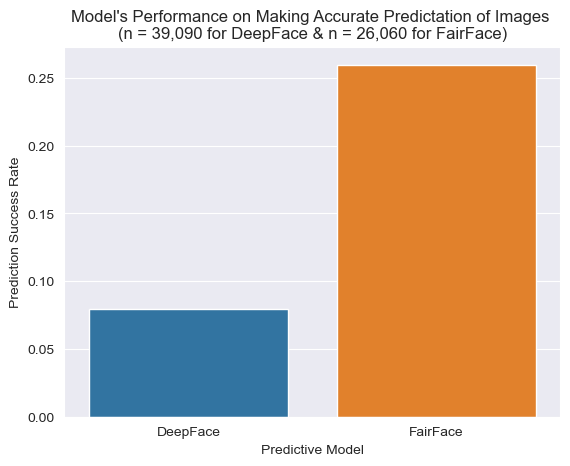

In [155]:
sns.set_style("darkgrid")
sns.barplot(permu_merge, x="pred_model", y="all_rate")
plt.xlabel("Predictive Model")
plt.ylabel("Prediction Success Rate")
plt.title("Model's Performance on Making Accurate Predictation of Images \n(n = 39,090 for DeepFace & n = 26,060 for FairFace)")